In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size =32
num_classes =10
epochs= 10

img_rows, img_cols =28,28

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(x_train.shape[0],img_rows, img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows, img_cols,1)
input_shape = (img_rows, img_cols,1)

In [ ]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

8

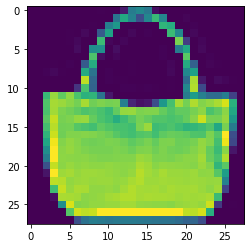

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[100].reshape(28,28))
train_labels[100]

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# preprocess function
# normalize x
def preprocess(x, y):
  x = x/255
  x = tf.expand_dims(x, 3)
  return x, y

In [ ]:
# make trainset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.map(preprocess)#.shuffle(1000, seed=42)    # shuffle

test_dataset  = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.map(preprocess)

In [ ]:
num_class =10

with tf.device('/device:GPU:0'):
  # model layer
  model = keras.models.Sequential([
              keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), ## 입력배열 28,28,1
              keras.layers.MaxPool2D(pool_size=(2, 2)),
              keras.layers.Dropout(0.25),
              keras.layers.Flatten(),
              keras.layers.Dense(128, activation='relu'),
              keras.layers.Dropout(0.5),
              keras.layers.Dense(num_class, activation='softmax') ## 출력 class = num_class
  ])

  # optimizer, loss, 성능평가 척도 설정
  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics='accuracy'
  )

In [ ]:
train_data_flow = datagen.flow(x_train, y_train, batch_size=10) #x_train, y_train

In [ ]:
len(train_data_flow)

6000

In [ ]:
with tf.device('/device:GPU:0'):
  hist1 = model.fit(train_dataset, validation_data=test_dataset,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 40s 6ms/step - loss: 1.0728 - accuracy: 0.6073 - val_loss: 0.6486 - val_accuracy: 0.7545
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6918 - accuracy: 0.7460 - val_loss: 0.5762 - val_accuracy: 0.7814
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6344 - accuracy: 0.7665 - val_loss: 0.5426 - val_accuracy: 0.7942
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6053 - accuracy: 0.7775 - val_loss: 0.5237 - val_accuracy: 0.8027
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5863 - accuracy: 0.7861 - val_loss: 0.4984 - val_accuracy: 0.8124
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5712 - accuracy: 0.7893 - val_loss: 0.4843 - val_accuracy: 0.8230
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5633 - accuracy: 0.7941 - val_loss: 0.4766 - val_ac